### This notebook will attempt to:
- Query the stock that you want
- The start and end date
- plot out the time series, together with the 50sma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline

In [2]:
def get_ticker():
    """
    It'll get the necessary info - ticker, startdate, enddate and will return a list of all these information
    """
    ticker = input("Enter ticker name: \n")
    start = input("Enter start date in this format: YYYY-M-D\n")
    end = input("Enter end date in this format: YYYY-M-D\n")
    stock_info = [ticker, start, end]
    return stock_info

def get_data(list):
    ticker = list[0]
    start = list[1]
    end = list[2]

    #Change the format of the dates to datetime format
    temp_start = start.split('-')
    start = datetime(int(temp_start[0]),int(temp_start[1]),int(temp_start[2]))
    temp_end = end.split('-')
    end = datetime(int(temp_end[0]),int(temp_end[1]),int(temp_end[2]))

    #I'll grab data from IEX in this case
    f = web.DataReader(ticker, 'iex', start, end)
    return f

def data_prep(df):
    """
    Adds the 50sma, 50sma_sd, sd_upper and sd_lower columns then returns the df w added info
    """
    df['sma50'] = df['close'].rolling(50,min_periods=1).mean() 
    df['sma50_sd'] = df['sma50'].rolling(50,min_periods=1).std()
    df['sd50_upper'] = df['sma50'] + 2*df['sma50_sd']
    df['sd50_lower'] = df['sma50'] - 2*df['sma50_sd']
    return df

In [3]:
    stock_info = get_ticker()
    ticker = stock_info[0]
    f = get_data(stock_info)
    f = data_prep(f)

Enter ticker name: 
CMCSA
Enter start date in this format: YYYY-M-D
2016-10-10
Enter end date in this format: YYYY-M-D
2018-12-12


In [4]:
f.head()

,open,high,low,close,volume,sma50,sma50_sd,sd50_upper,sd50_lower
date,,,,,,,,,
2016-10-10,31.2035,31.4514,31.1845,31.3513,14850010,31.351300,NaN,NaN,NaN
2016-10-11,31.3227,31.3227,30.9176,30.9605,14763696,31.155900,0.138169,31.432237,30.879563
2016-10-12,31.0224,31.2507,30.9366,31.0939,12826002,31.135233,0.119229,31.373691,30.896776
2016-10-13,30.9223,31.1225,30.6052,31.0367,14289662,31.110600,0.110260,31.331121,30.890079
2016-10-14,31.0749,31.3322,30.9748,31.0749,15327680,31.103460,0.102743,31.308947,30.897973


**Convert the index into datetime format**

In [5]:
dates_times_obj = []
for i in f.index:
    dates_times_obj.append(datetime.strptime(i, '%Y-%m-%d').date())

Double check:

In [6]:
dates_times_obj

[datetime.date(2016, 10, 10),
 datetime.date(2016, 10, 11),
 datetime.date(2016, 10, 12),
 datetime.date(2016, 10, 13),
 datetime.date(2016, 10, 14),
 datetime.date(2016, 10, 17),
 datetime.date(2016, 10, 18),
 datetime.date(2016, 10, 19),
 datetime.date(2016, 10, 20),
 datetime.date(2016, 10, 21),
 datetime.date(2016, 10, 24),
 datetime.date(2016, 10, 25),
 datetime.date(2016, 10, 26),
 datetime.date(2016, 10, 27),
 datetime.date(2016, 10, 28),
 datetime.date(2016, 10, 31),
 datetime.date(2016, 11, 1),
 datetime.date(2016, 11, 2),
 datetime.date(2016, 11, 3),
 datetime.date(2016, 11, 4),
 datetime.date(2016, 11, 7),
 datetime.date(2016, 11, 8),
 datetime.date(2016, 11, 9),
 datetime.date(2016, 11, 10),
 datetime.date(2016, 11, 11),
 datetime.date(2016, 11, 14),
 datetime.date(2016, 11, 15),
 datetime.date(2016, 11, 16),
 datetime.date(2016, 11, 17),
 datetime.date(2016, 11, 18),
 datetime.date(2016, 11, 21),
 datetime.date(2016, 11, 22),
 datetime.date(2016, 11, 23),
 datetime.date(20

#### The plotting begins :)

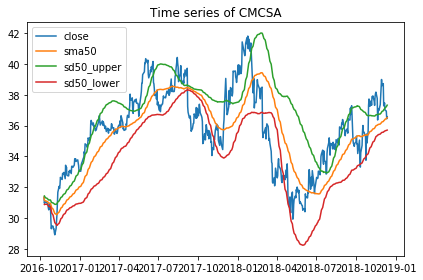

In [7]:
plt.plot(dates_times_obj,f['close'])
plt.plot(dates_times_obj,f['sma50'])
plt.plot(dates_times_obj,f['sd50_upper'])
plt.plot(dates_times_obj,f['sd50_lower'])
plt.title('Time series of '+ticker)
plt.legend()
plt.tight_layout()

**Candlestick plot**

In [8]:
import plotly
import cufflinks as cf
cf.go_offline()

In [9]:
f[['open','high','low','close']].iplot(kind='candle')